## Simple Linear Regression

> 原作者：https://github.com/chwang12341/Machine-Learning/tree/master/Linear_Regression

In [1]:
## 導入所需的套件
## 導入Python數據處理套件
import numpy as np
import pandas as pd
## 導入視覺化套件
import matplotlib.pyplot as plt
## 導入Sklearn套件
## 導入將數據集拆成訓練集與測試集的套件
from sklearn.model_selection import train_test_split
## 導入迴歸模型套件
from sklearn.linear_model import LinearRegression

In [2]:
## 導入數據集
dataset = pd.read_csv("data/linear_regression_dataset_sample.csv")

In [3]:
dataset

,Subject_ID,Learning_Hours,Salary
0,1,1.2,66000
1,2,1.3,60000
2,3,1.5,58000
3,4,1.6,70000
4,5,2.1,66000
5,6,2.6,78000
6,7,2.8,68000
7,8,3.0,70000
8,9,3.5,82000
9,10,3.6,78000


In [4]:
# 取出第一列(58,)，再reshape成(58,1)
X = dataset.iloc[:, 1].values.reshape(-1,1)
y = dataset.iloc[:,2].values

In [5]:
print(X.shape)
print(y.shape)

(58, 1)
(58,)


In [8]:
# y
# X

### 切分數聚集

In [9]:
## 將數據集拆成訓練集與測試集(7:3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [10]:
print(f"X_train : X_test = {X_train.shape[0]/X.shape[0]}:{X_test.shape[0]/X.shape[0]}")
print(f"y_train : y_test = {y_train.shape[0]/y.shape[0]}:{y_test.shape[0]/y.shape[0]}")

X_train : X_test = 0.6896551724137931:0.3103448275862069
y_train : y_test = 0.6896551724137931:0.3103448275862069


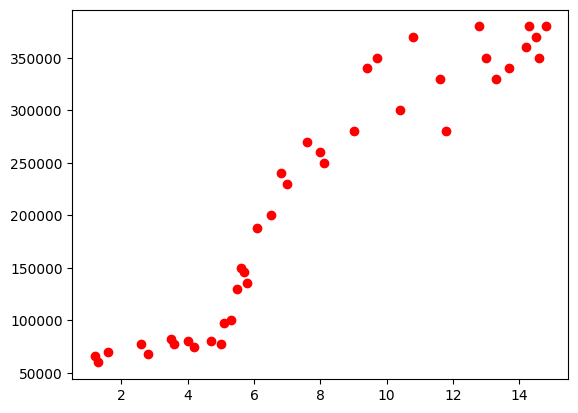

In [11]:
## 視覺化迴歸模型與訓練集的關聯
plt.scatter(X_train, y_train, color = 'red')

# 1. model & train

In [12]:
## 訓練與建構迴歸模型
regressor = LinearRegression()
regressor.fit(X_train, y_train)

## 計算出截距值與係數值
b = regressor.intercept_
w = regressor.coef_

print('Interception : ', b)
print('Coeficient : ', w)

Interception :  5968.556965420779
Coeficient :  [26828.07518663]


## 2. predict

In [13]:
## 拿訓練好的迴歸模型預測測試集資料的目標值(依變數)
y_pred = regressor.predict(X_test)
print('Predict : ', y_pred)

Predict :  [242055.6186078  239372.81108914 279614.92386909 199130.69830919
 107915.24267463  46210.66974537 234007.19605181 306442.99905573
 164254.20056656 333271.07424236  62307.51485735 105232.43515597
 215227.54342117 268883.69379444 228641.58101449 271566.5013131
 252786.84868246  86452.78252532]


## 3. evaluation

In [14]:
## 迴歸模型的準確度
score = regressor.score(X_test, y_test)
print('Score: ', score)
print('Accuracy: ' + str(score*100) + '%')

Score:  0.8301578721256048
Accuracy: 83.01578721256048%


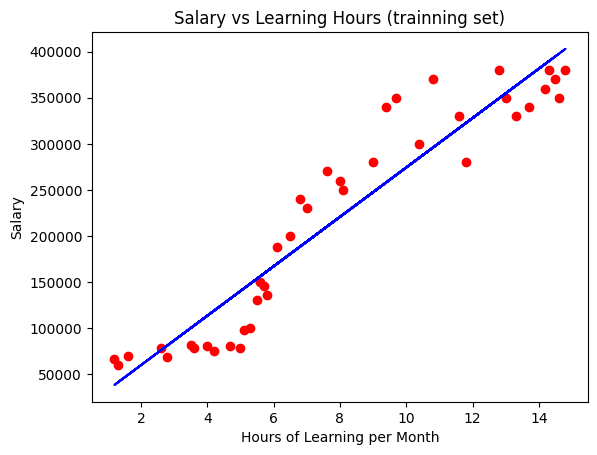

In [15]:
## 視覺化迴歸模型與訓練集的關聯
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Learning Hours (trainning set)')
plt.xlabel("Hours of Learning per Month")
plt.ylabel("Salary")
plt.show()

In [16]:
# x =0 ? predict = b
regressor.predict(np.array([[0]]))

array([5968.55696542])

## 自行寫一個梯度下降（Gradient Decent）來實現迴歸模型預測

Interception:  [5383.65220318]
Coeficient:  [26886.29633745]


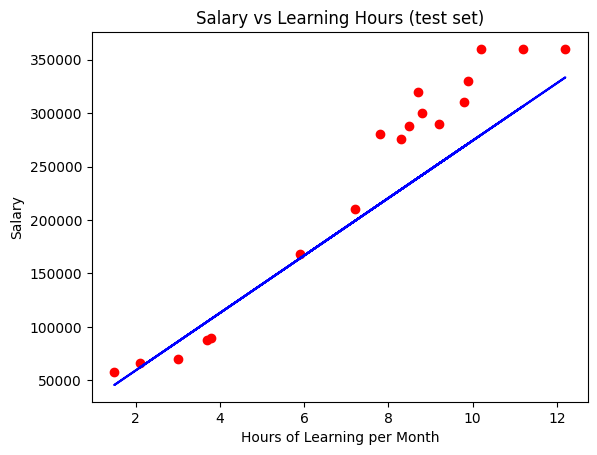

In [18]:
## 導入Python數據處理套件
import numpy as np
import pandas as pd


## 導入數據集
dataset = pd.read_csv("data/linear_regression_dataset_sample.csv")
X = dataset.iloc[:, 1].values.reshape(-1,1)
y = dataset.iloc[:,2].values

## 將數據集拆成訓練集與測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


## 參數
##學習率(Learning Rate): alpha值
alpha = 0.0001
## 訓練迴歸模型的迭代次數
trainning_repeats = 2000

## 初始化變數
## 截距與係數值 (Interception & Coeficient)
w0 = 0
w1 = 0
## 誤差 (實際值與預測值的誤差)
errors = []

## 訓練模型
for j in range(trainning_repeats):

    ## 最小平方值(誤差平方相加)
    squared_error_sum = 0

    ## 微分過後的成本函數(Cost Function)
    error_sum_x = 0
    error_sum = 0

    for i in range(len(X_train)):
        ## 預測公式: 簡單線性迴歸公式 y = w0 + w1x
        predict = w0 + (X_train[i] * w1)

        ## 最小平方法 計算成本函數
        squared_error_sum = squared_error_sum + (y_train - predict)**2

        ## 計算微分過後的成本函數(Cost Function)
        error_sum = error_sum + y_train[i] - predict
        error_sum_x = error_sum_x + (y_train[i] - predict) * X_train[i]

    ## 實現梯度下降(Gradient Descent)的方法
    ## 更新權重值 將原本的權重值 + 學習率 * 微分過後的成本函數(Cost Function)
    w0 = w0 + (alpha * error_sum)
    w1 = w1 + (alpha * error_sum_x)
    errors.append(squared_error_sum / len(X_train))


## 印出權重值
print('Interception: ', w0)
print('Coeficient: ', w1)
# print('每個數據點的誤差值: ', errors)

## 拿訓練好的模型來進行預測
predicts_y = []
mean_error = 0
for i in range(len(X_test)):

    ## 預測公式: 簡單線性迴歸公式 y = w0 + w1x
    predict = w0 + (X_test[i] * w1)
    predicts_y.append(predict)


## 視覺化
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_test, predicts_y, color = 'blue')
plt.title('Salary vs Learning Hours (test set)')
plt.xlabel("Hours of Learning per Month")
plt.ylabel("Salary")
plt.show()